In [7]:
!pip install transformers torch pillow

In [8]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

In [9]:
model_name = "openai/clip-vit-base-patch32"

model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

The image processor of type `CLIPImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. 


tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Saving happy-healthy-boy-eating-apple-isolated-white-HGPEE3.jpg to happy-healthy-boy-eating-apple-isolated-white-HGPEE3.jpg


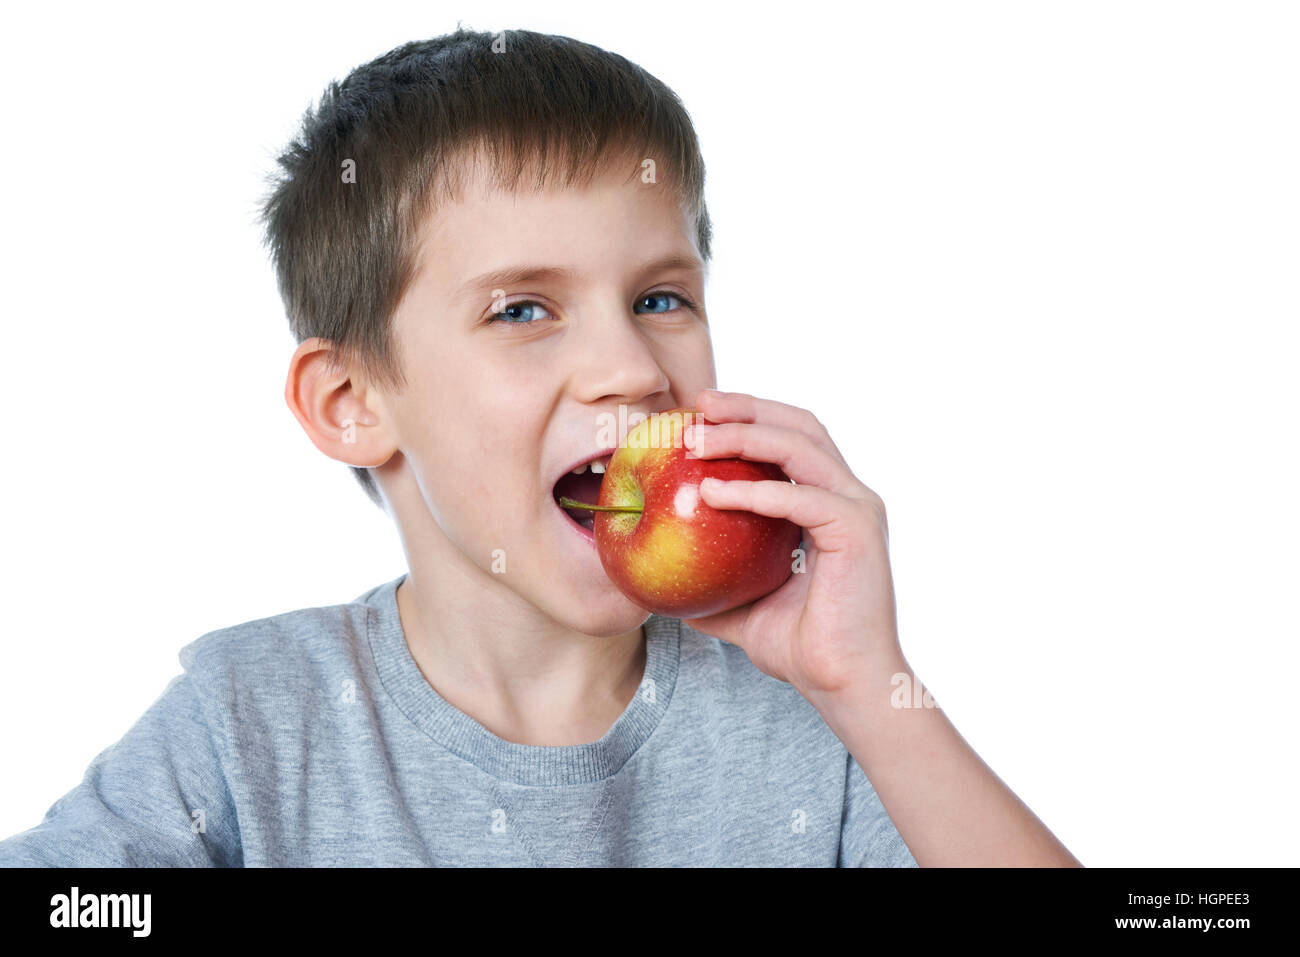

In [10]:
from google.colab import files
uploaded = files.upload()

image = Image.open(list(uploaded.keys())[0])
image

In [11]:
captions = [
    "A dog running in a park",
    "A cat sitting on a sofa",
    "A person riding a bicycle",
    "A group of people eating food",
    "A car parked on the road"
]

In [12]:
inputs = processor(
    text=captions,
    images=image,
    return_tensors="pt",
    padding=True
)

outputs = model(**inputs)

logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

best_caption = captions[probs.argmax()]

print("Predicted Caption:", best_caption)

Predicted Caption: A group of people eating food
